<a href="https://colab.research.google.com/github/VaishnaviBairagoni/AIML-Lab/blob/main/Assignment-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

Confusion Matrix:[[410   0]
 [  0 972]]
Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


NameError: name 'accuracy' is not defined

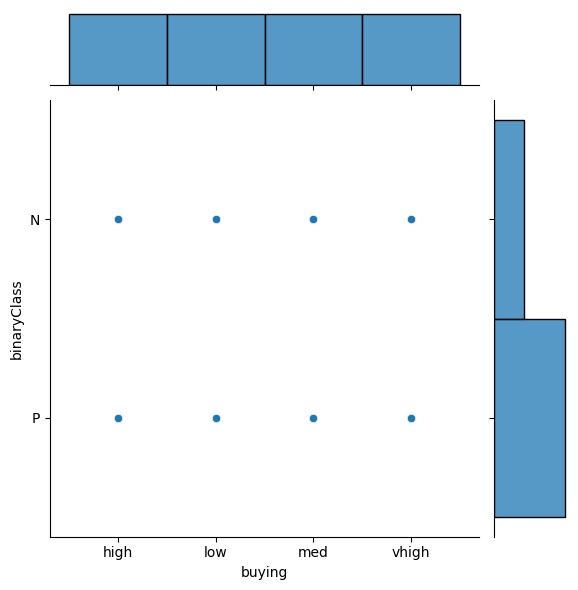

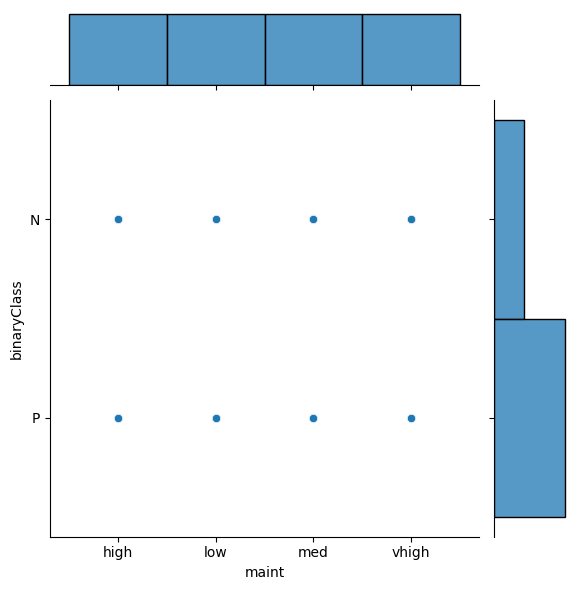

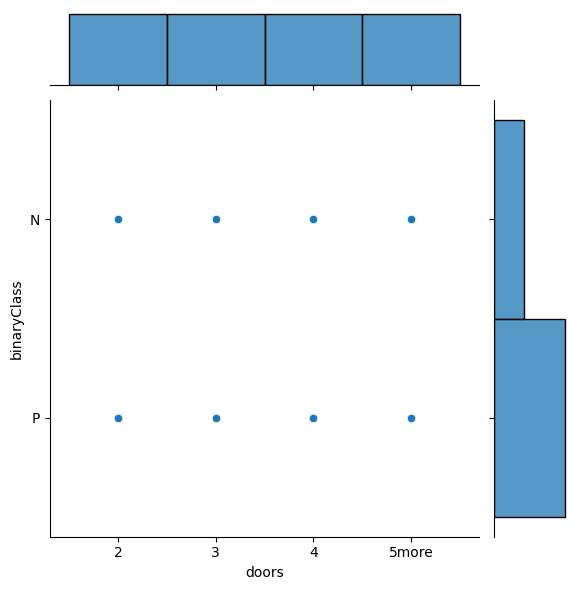

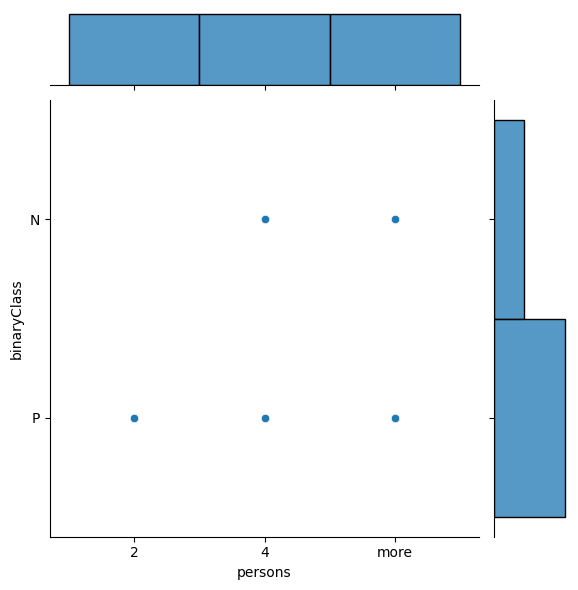

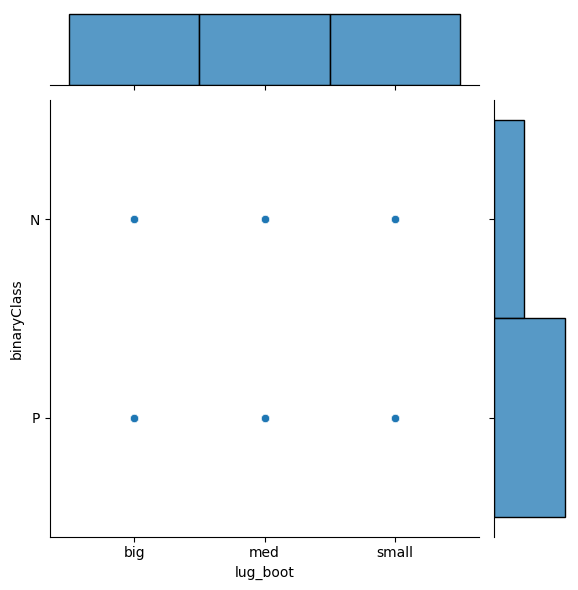

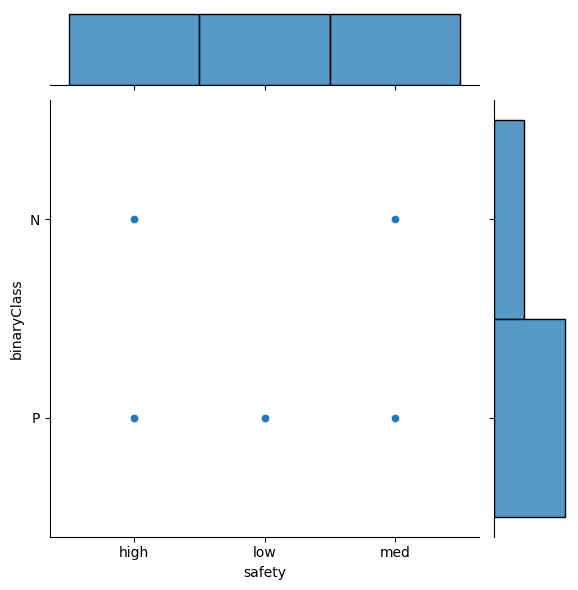

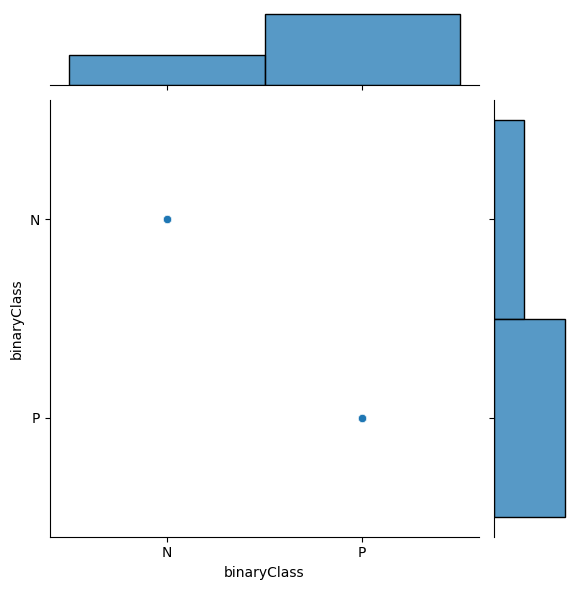

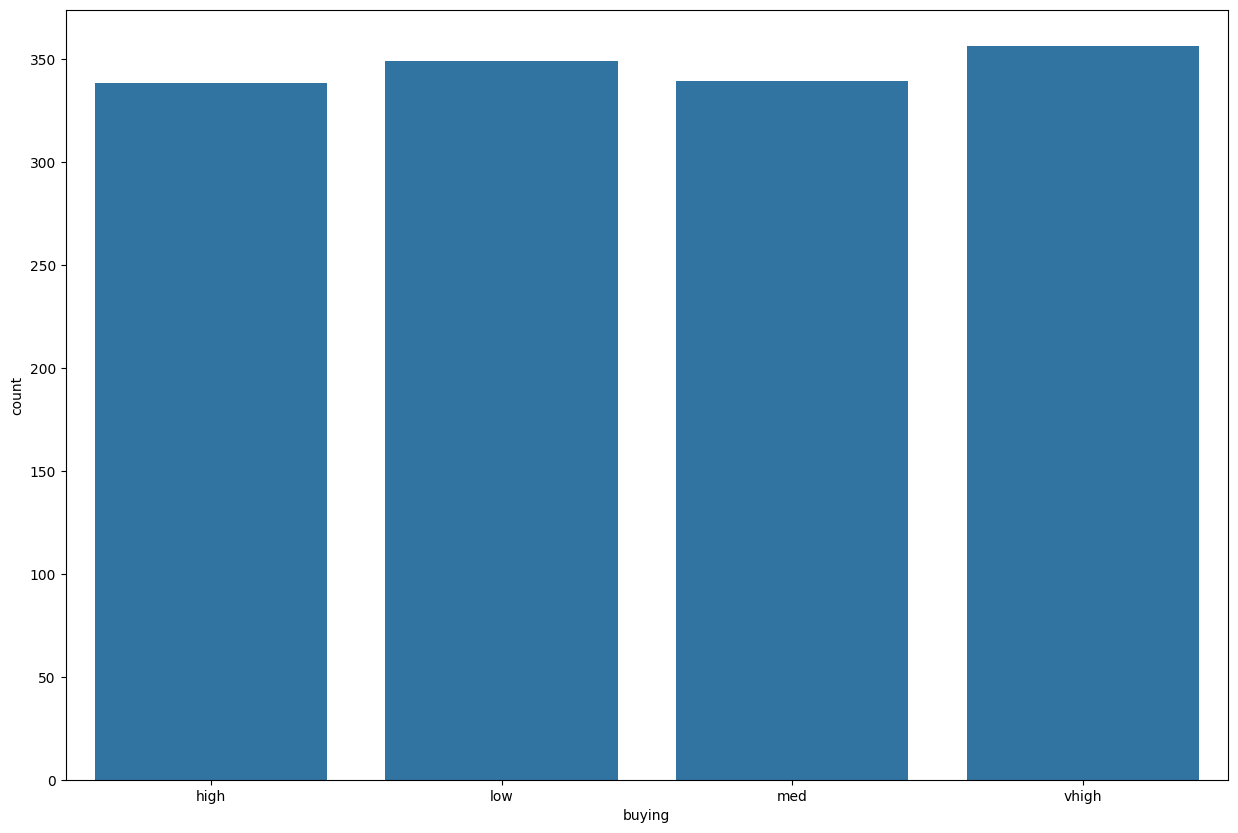

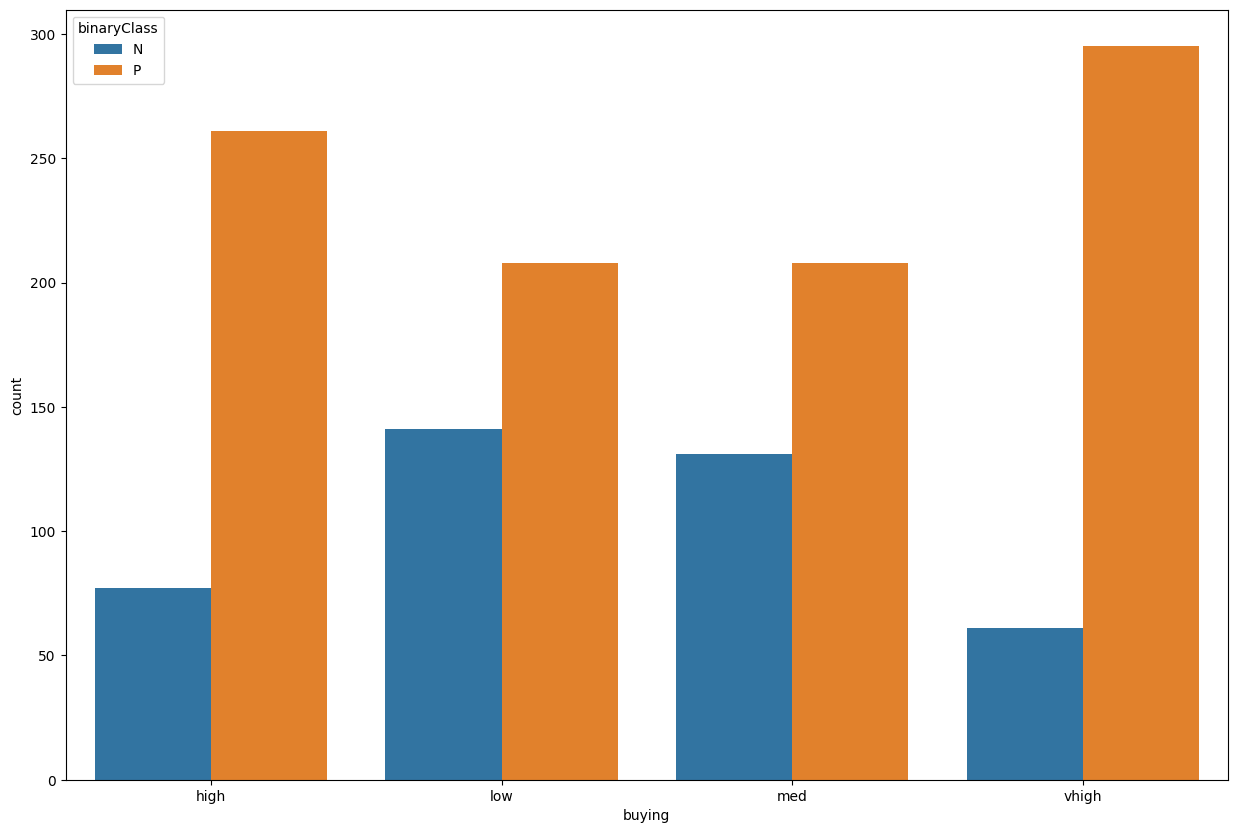

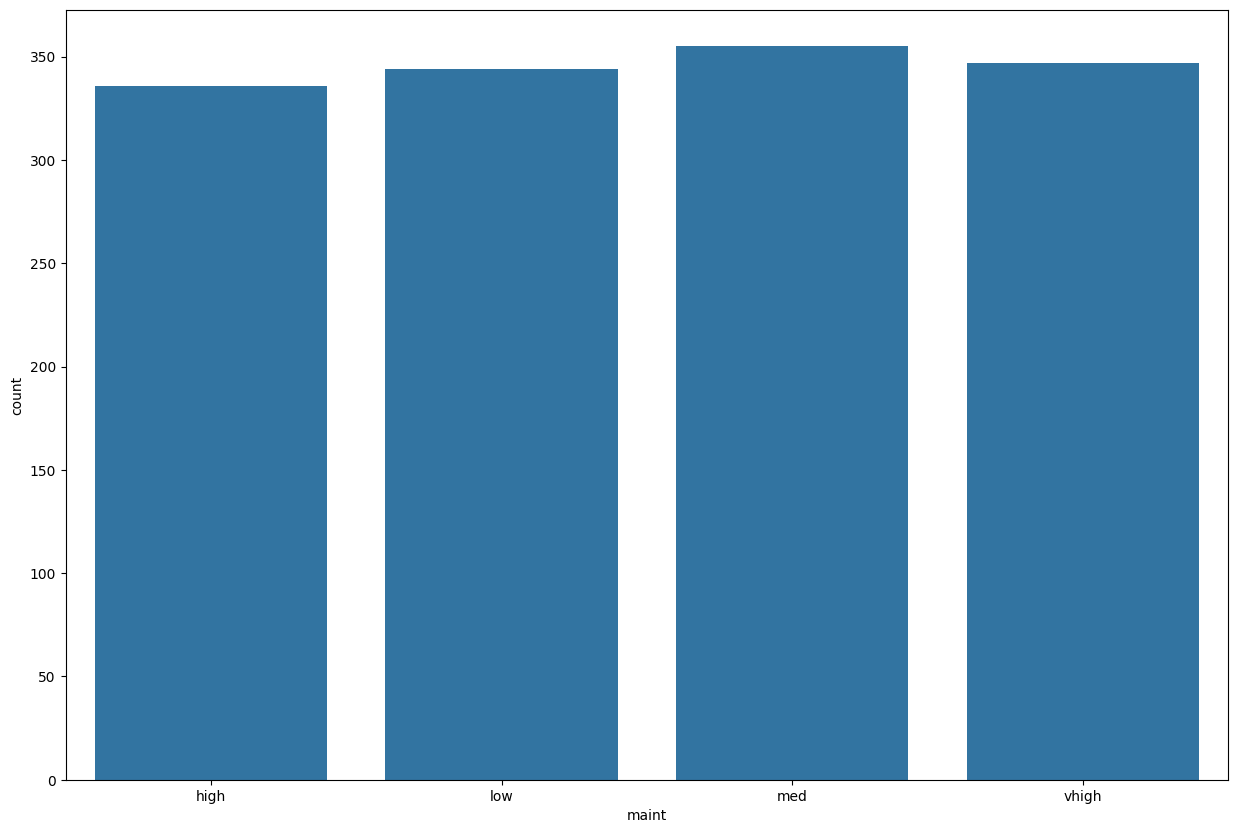

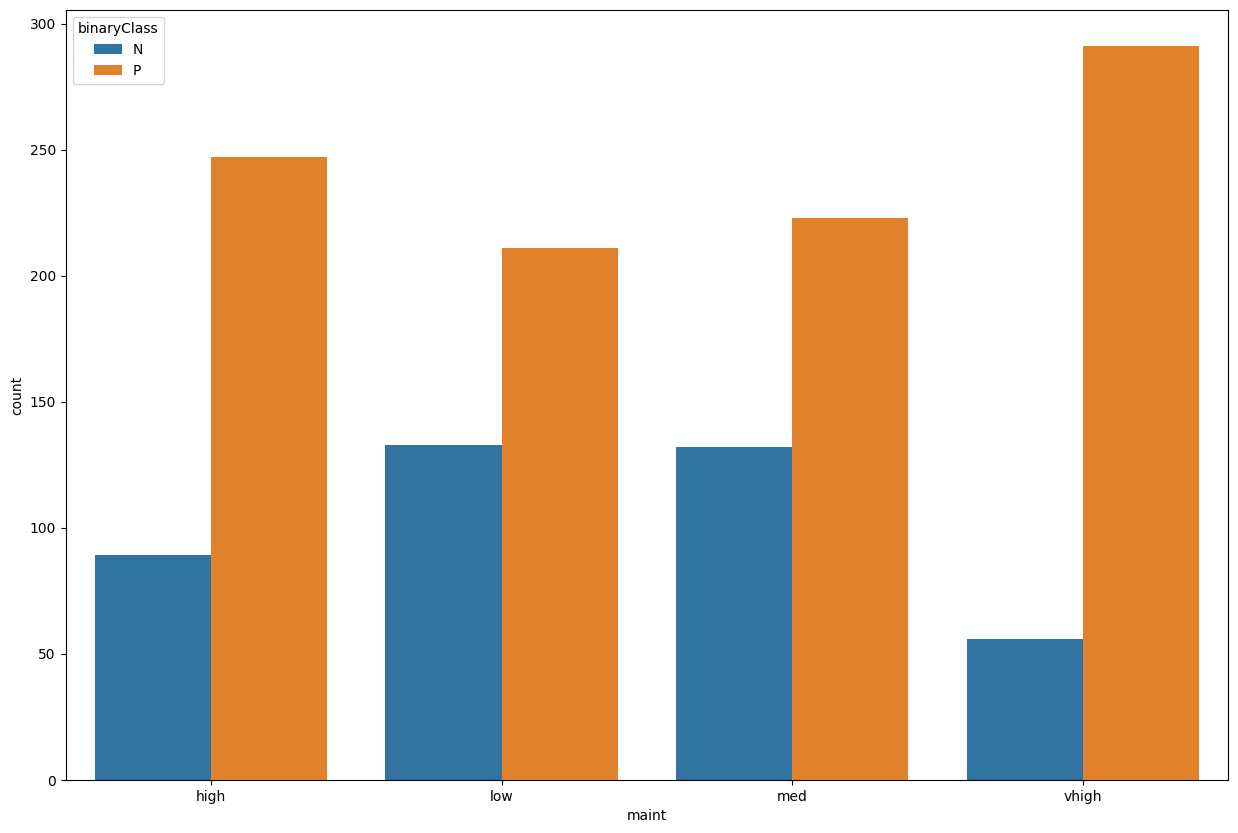

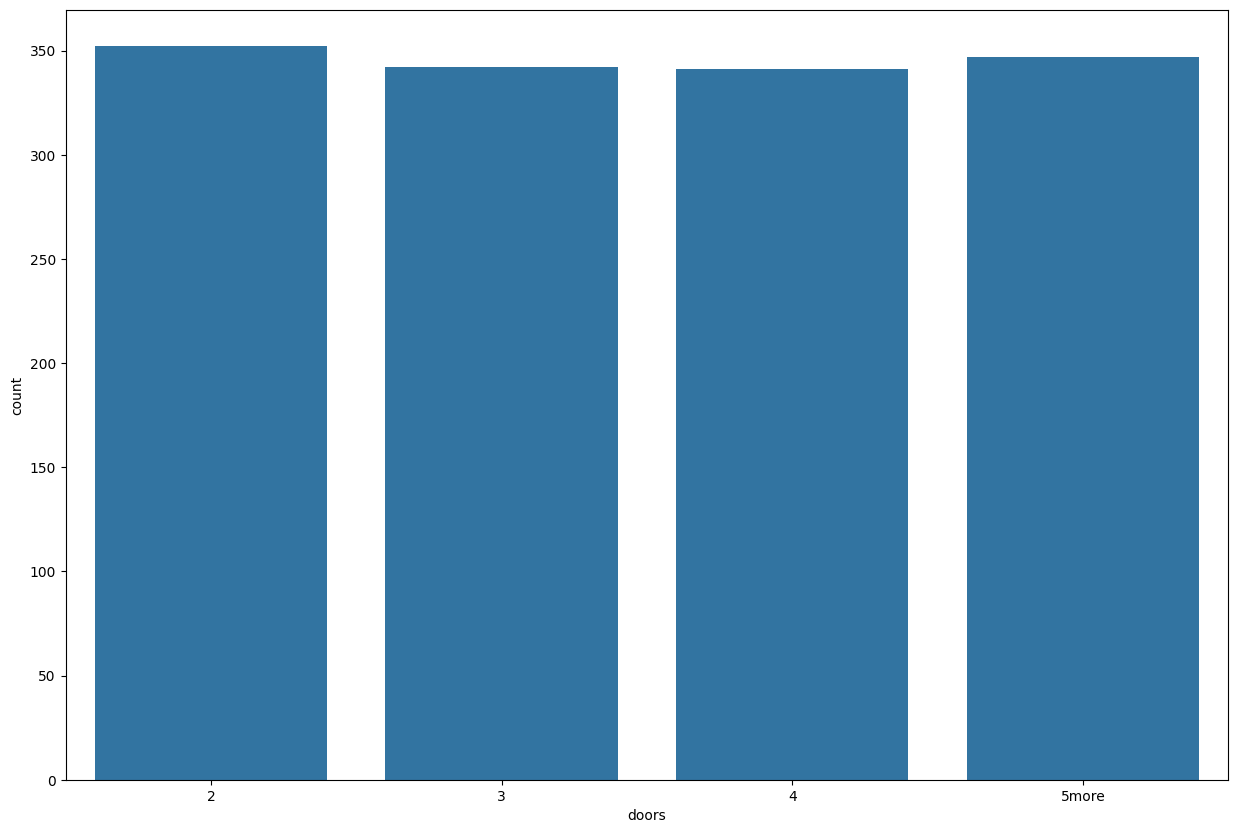

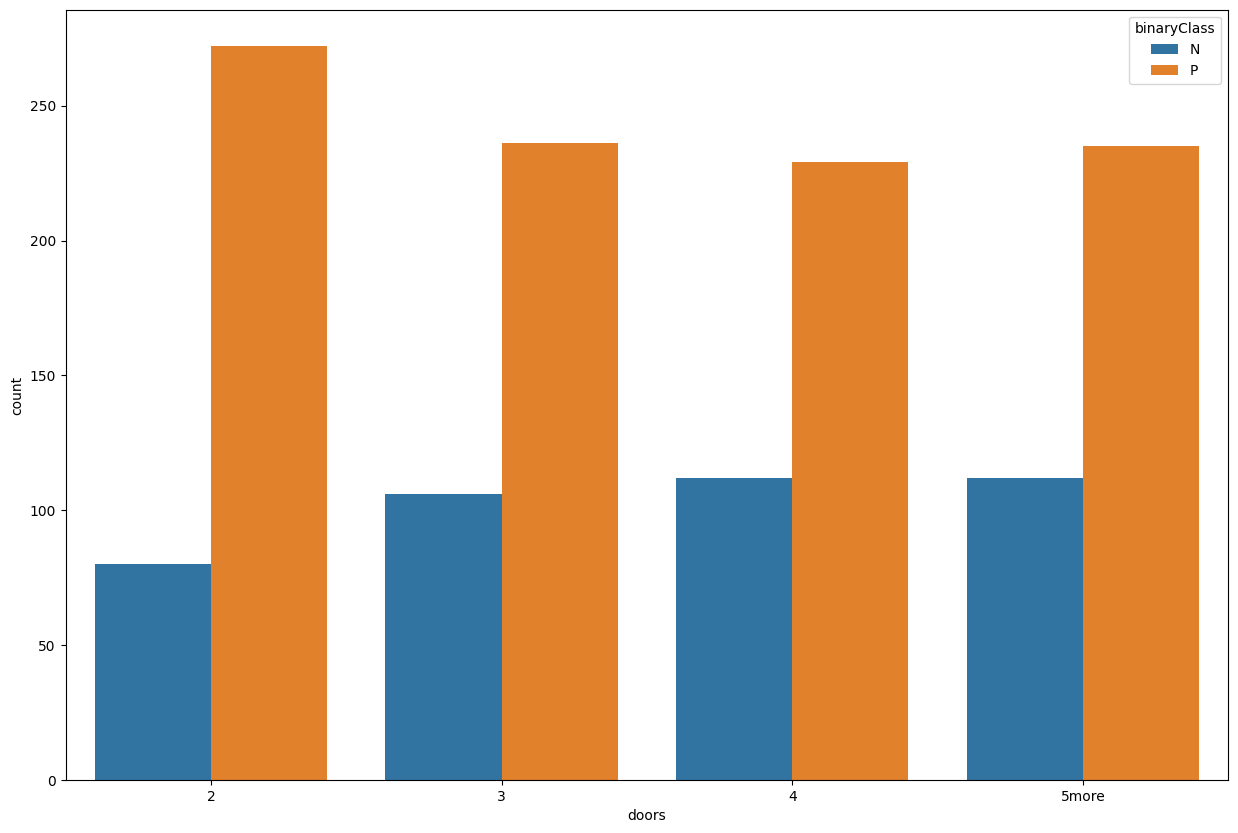

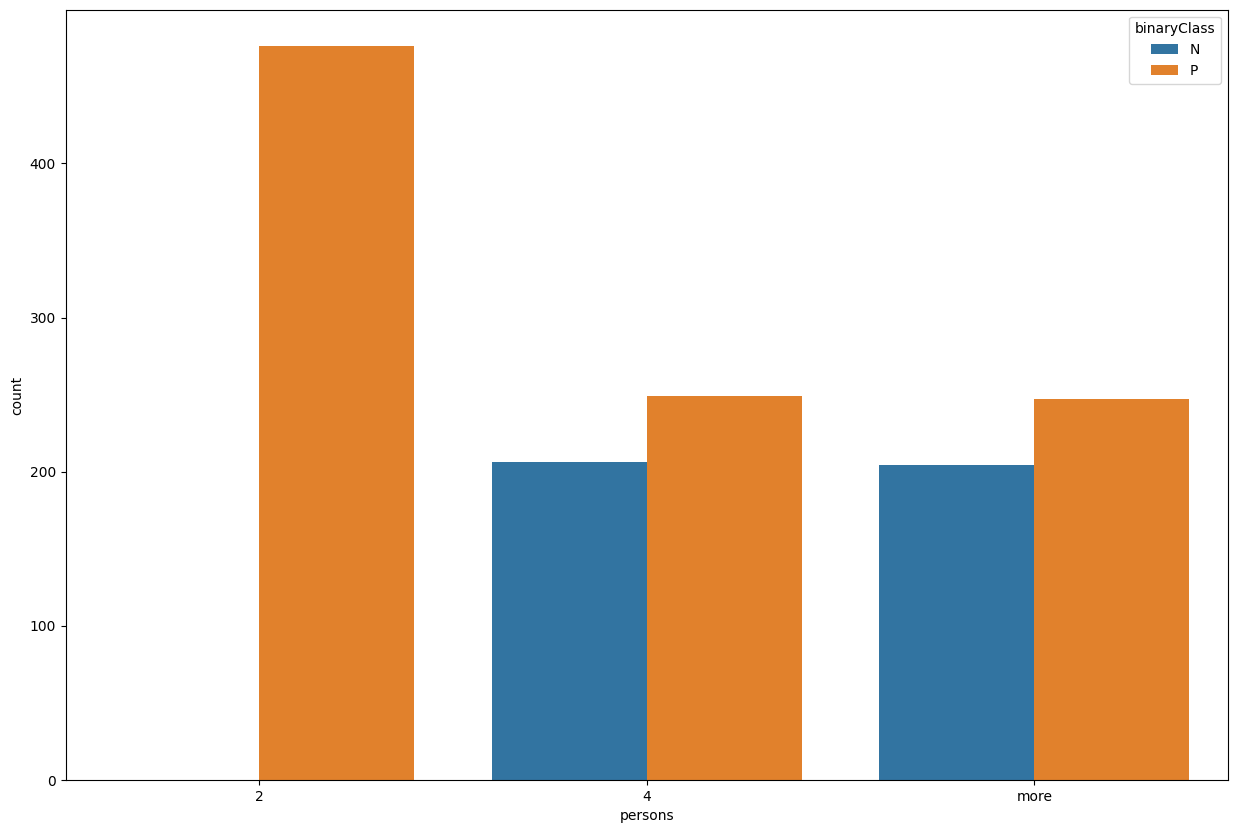

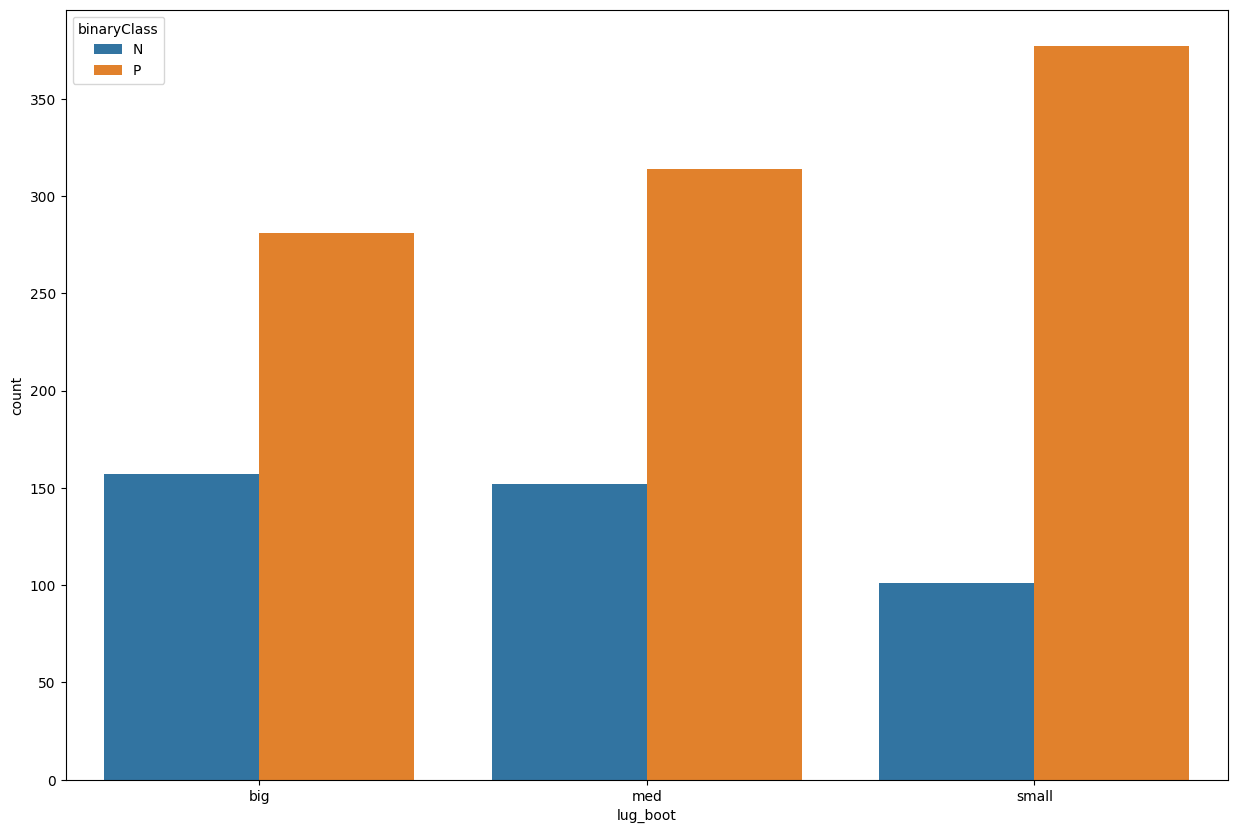

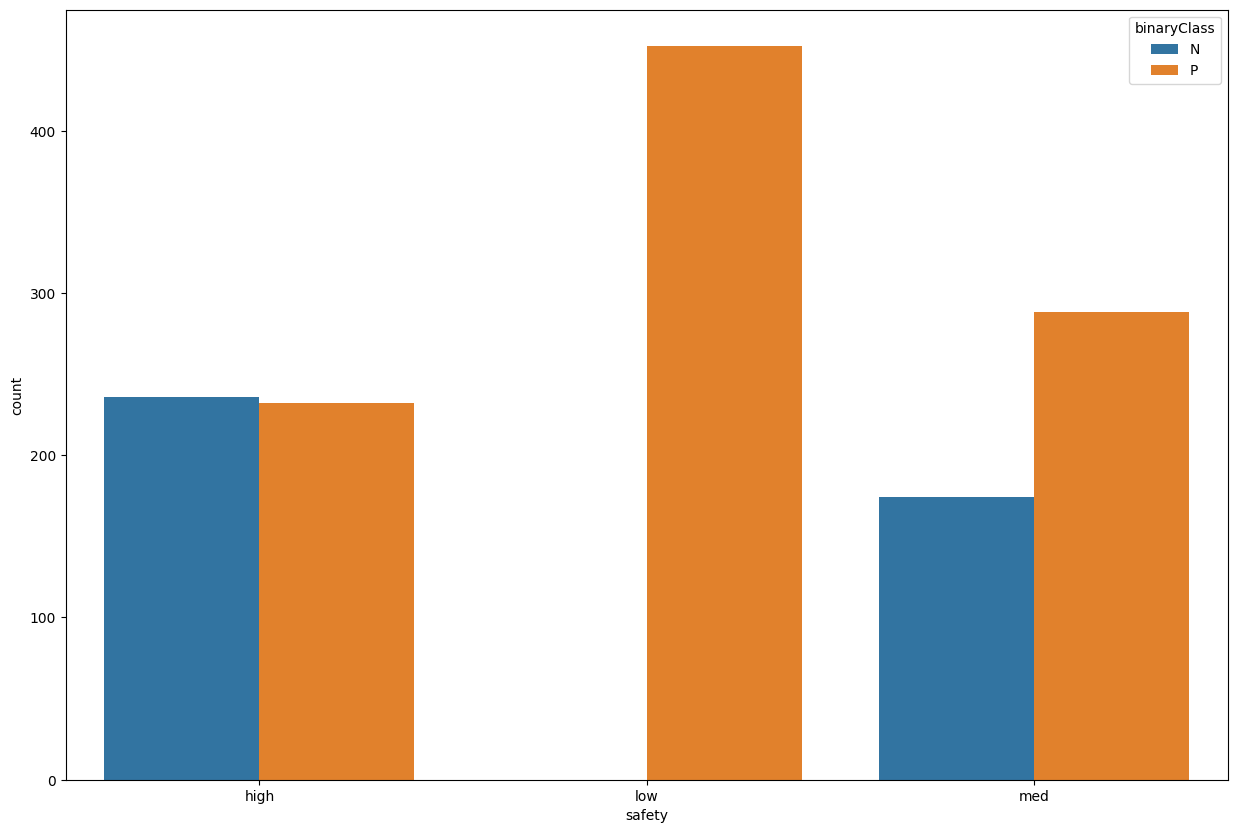

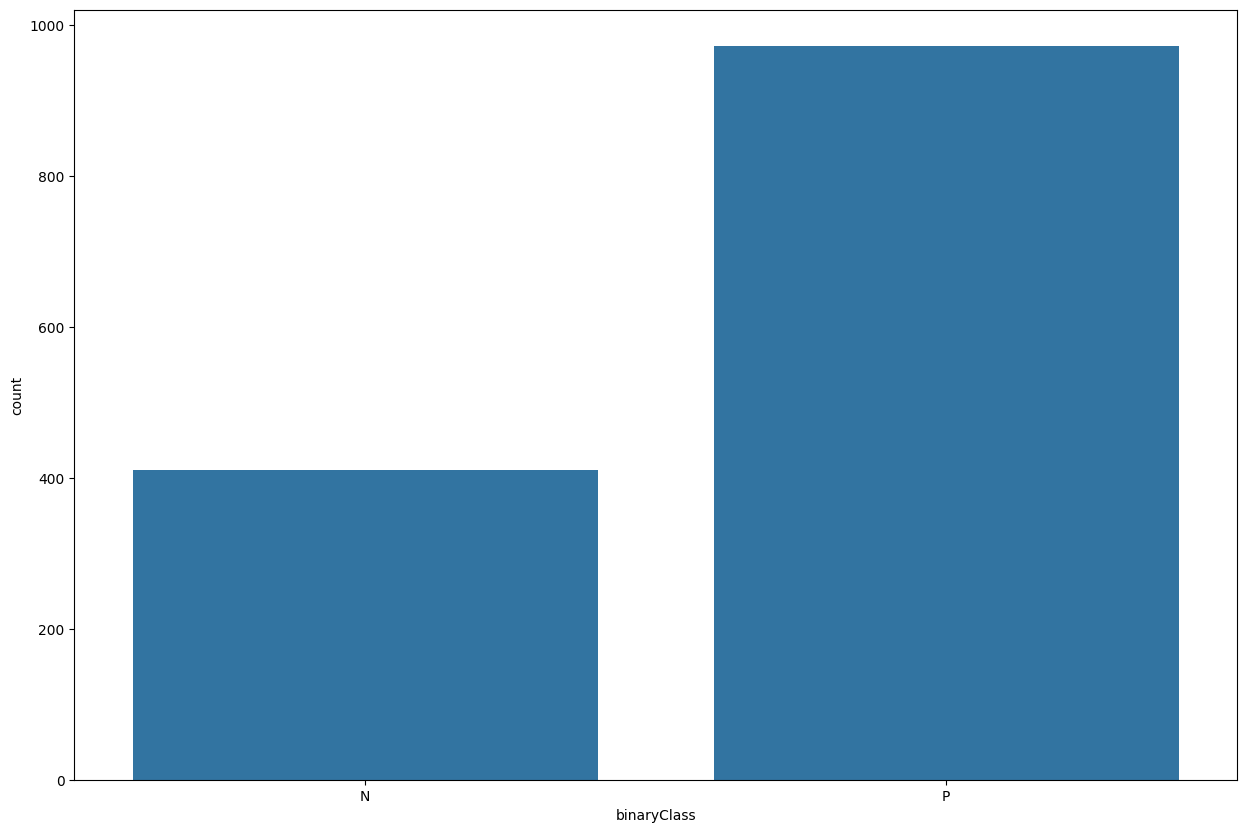

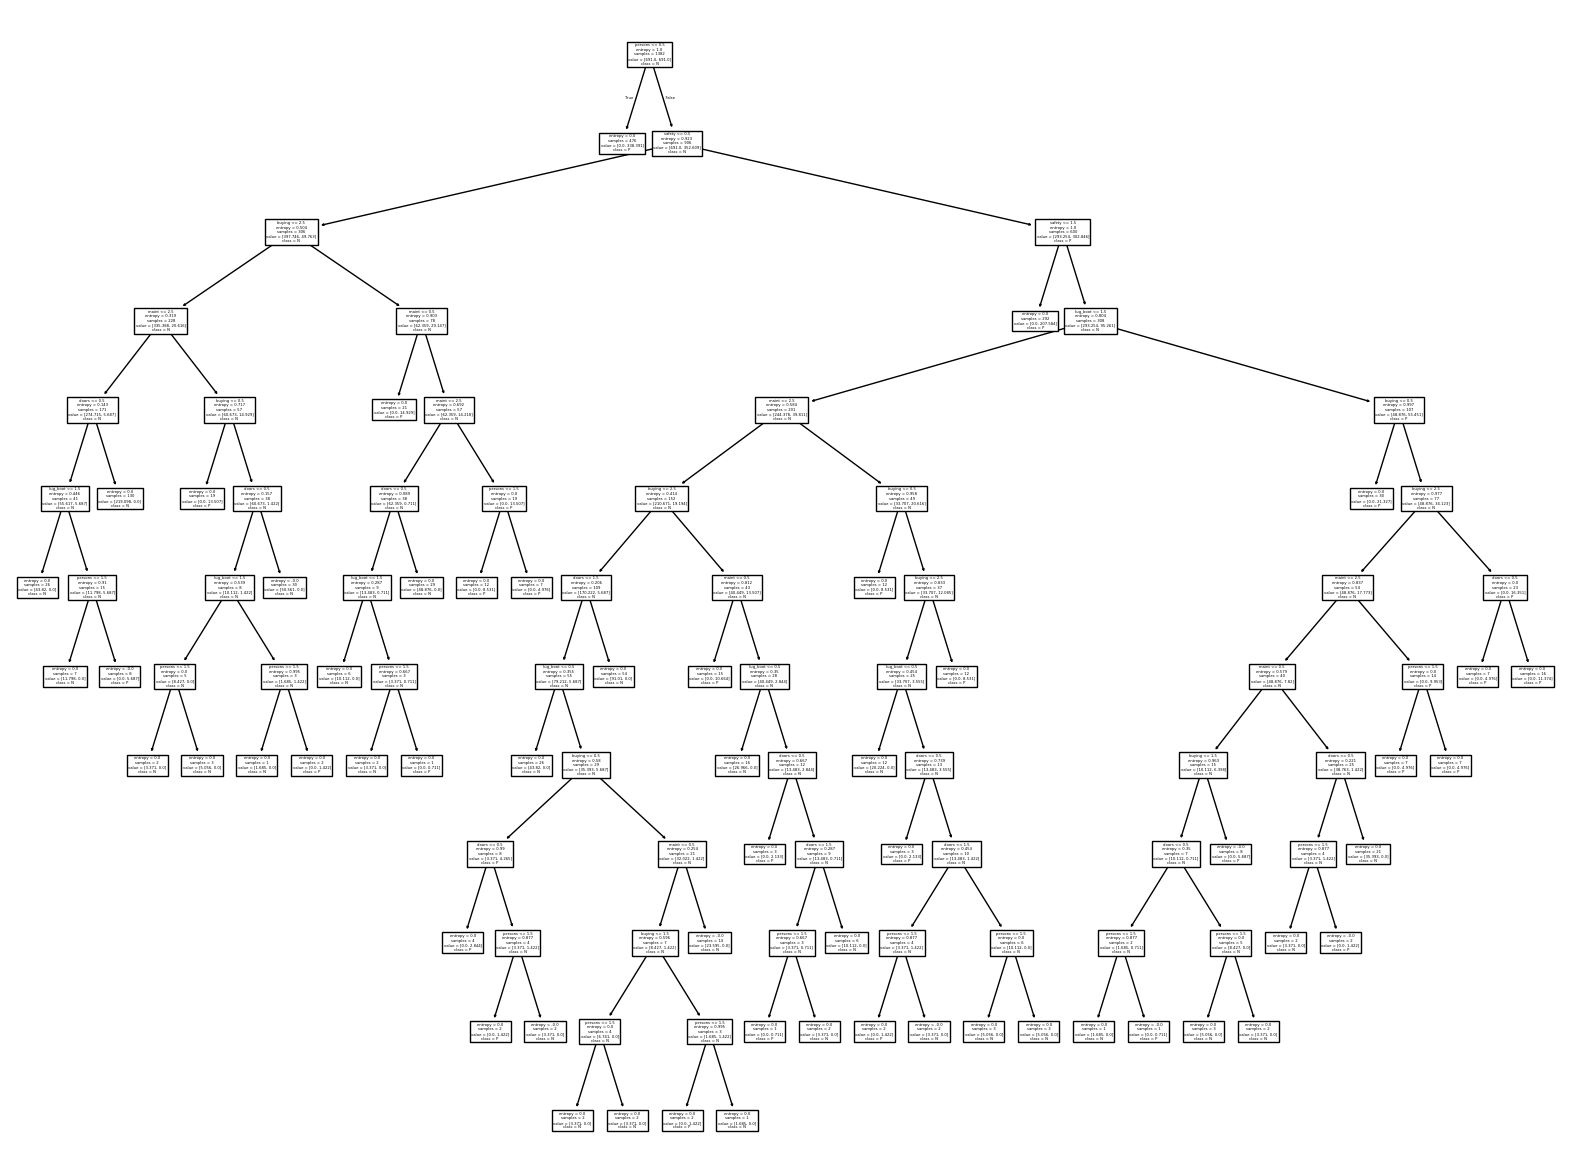

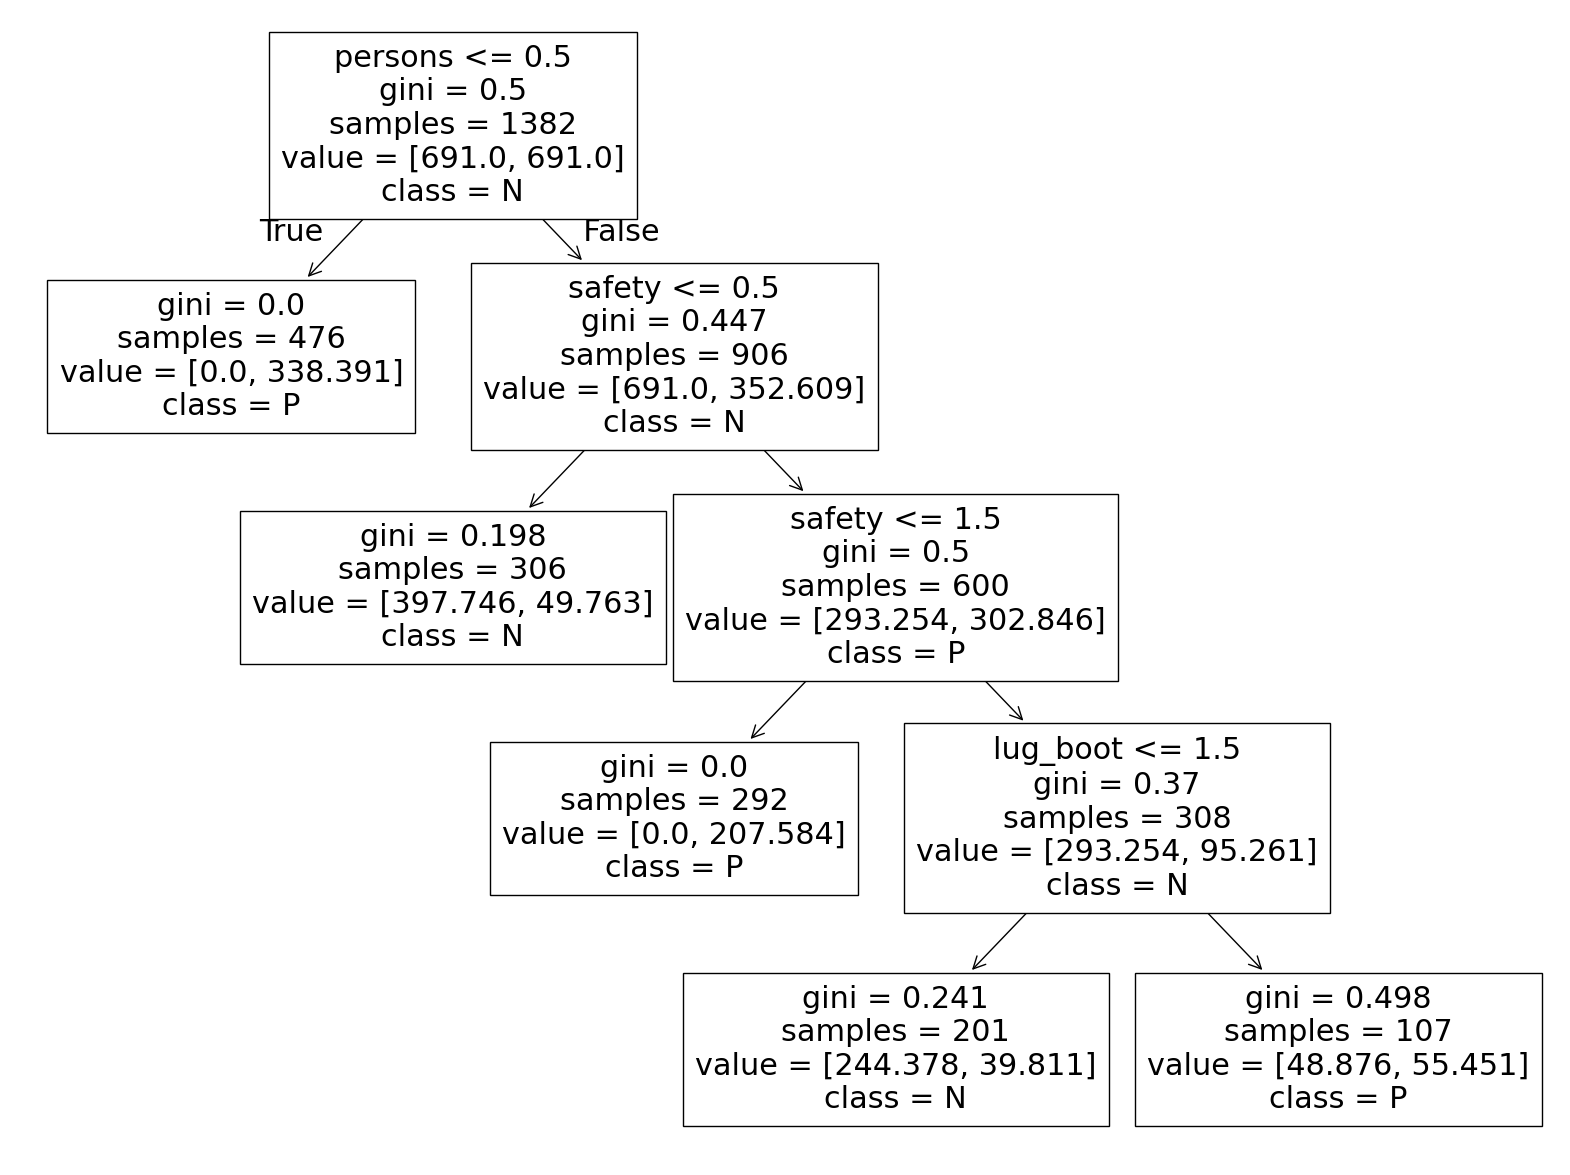

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline
fetch_openml(data_id=5).keys
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2,
                        parser='auto')
type(car_data)
car_data.keys()
car_data.feature_names, car_data.target.value_counts()
# Data description

print(car_data.DESCR)
# Displaying feature names

car_data.feature_names
# Getting the whole dataframe
car_data = car_data.frame
car_data.head()
type(car_data)
#car_data.columns
l = len(car_data.columns)
for i in range(l):
  sns.jointplot(x=car_data.columns[i],y='binaryClass',
              data=car_data,palette='rainbow')
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.2,
                                         random_state=220)

#print('Dataset size:{}\ntraining data is: {}\n
#testing data is: {}'.format(len(car_data),
#                            len(train_data),len(test_data)))
car_data.shape, train_data.shape, test_data.shape
# Checking summary statistics

train_data.describe()
# Checking missing values
train_data.isnull().sum()
train_data.columns
train_data['buying'].value_counts()
train_data['maint'].value_counts()
train_data['doors'].value_counts()
train_data['persons'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')


train_data['maint'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')
train_data['doors'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')
train_data['persons'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')
train_data['lug_boot'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')
train_data['safety'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')
train_data['binaryClass'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([('ord_enc', OrdinalEncoder())])

car_train_prepared = pipe.fit_transform(car_train)
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)
car_train_prepared.shape, car_labels_prepared.shape
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.set_params(class_weight='balanced', criterion='entropy')

tree_clf.fit(car_train_prepared, car_labels_prepared)
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns,
          class_names=['N','P']);
# if you run this, it will be error.
# SKlearn tree implementation doesn't support categorical features

#from sklearn.tree import DecisionTreeClassifier

#tree_clf = DecisionTreeClassifier()

#tree_clf.fit(car_train, car_labels)
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix

preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")
accuracy_score(car_labels_prepared,preds)
tree_clf.get_params()
# Let's hide warnings returned by grid search

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)
grid_search.best_params_
grid_search.best_estimator_
tree_best = grid_search.best_estimator_
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);
accuracy(car_train_prepared, tree_best, car_labels_prepared)
conf_matrix(car_train_prepared, tree_best, car_labels_prepared)
class_report(car_train_prepared, tree_best, car_labels_prepared)
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']
# Handling the categorical features with the pipeline that we defined early
# We don't fit on the test data. Only transform

car_test_prepared = pipe.transform(car_test)
# Handle labels too

car_test_labels_prepared = label_enc.transform(car_test_labels)
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)
class_report(car_test_prepared, tree_best, car_test_labels_prepared)